<a href="https://colab.research.google.com/github/rajakumar05032000/Fake-review-detection-system/blob/main/Fake_review_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd,numpy as np,seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import tensorflow as tf
import nltk
import string

In [ ]:
#Mounting Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Copy /content/drive/MyDrive/yelp_review.csv.zip to /content
!cp -r '/content/drive/MyDrive/yelp_review.csv.zip' '/content/'

In [ ]:
#Unzipping Yelp Dataset
!unzip yelp_review.csv.zip

Archive:  yelp_review.csv.zip
  inflating: yelp_review.csv         


In [ ]:
#Loading the Yelp Dataset
yelp_reviews = pd.read_csv('yelp_review.csv')
yelp_reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [ ]:
#Listing the Columns
yelp_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [ ]:
yelp_reviews=yelp_reviews[:200000]

In [ ]:
#Dropping Unwanted Columns
yelp_reviews=yelp_reviews.drop(['review_id','user_id','business_id','date','useful','funny','cool'],axis=1)
yelp_reviews.head()

,stars,text
0,5,Super simple place but amazing nonetheless. It...
1,5,Small unassuming place that changes their menu...
2,5,Lester's is located in a beautiful neighborhoo...
3,4,Love coming here. Yes the place always needs t...
4,4,Had their chocolate almond croissant and it wa...


In [ ]:
#Check if there is Null Values
yelp_reviews.isnull().any()

stars    False
text     False
dtype: bool

In [ ]:
#Finding What are the Star Values
yelp_reviews.stars.unique()

array([5, 4, 3, 1, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


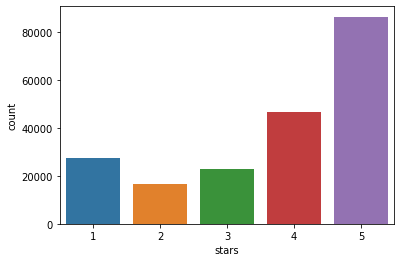

In [ ]:
#Plotting a Count Plot based on star Values
sns.countplot(yelp_reviews.stars)

In [ ]:
#Taking Reviews leaving start 3 alone 
reviews = yelp_reviews[yelp_reviews.stars!=3]


In [ ]:
reviews['label'] = reviews['stars'].apply(lambda x: 1 if x>3 else 0)
reviews = reviews.drop('stars',axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

text = reviews.text.values
label = reviews.label.values
one=0
ze=0
for i in label:
  if i==1:
    one=one+1
  else:
    ze=ze+1
print(one)
print(ze)

133289
43932


In [ ]:
class1=reviews[reviews['label']==1]
class2=reviews[reviews['label']==0]

In [ ]:
class1=class1.head(43932)
class2=class2.head(43932)

In [ ]:
result = pd.concat([class1, class2], axis=0)

In [ ]:
reviews = result.sample(frac = 1)

In [ ]:
#Print the Shape of Review
reviews.shape

(87864, 2)

In [ ]:
#Placing text and label column values in two different list test and label respectively
text = reviews.text.values
label = reviews.label.values

In [ ]:
#Spacy - advanced natural language processing and machine learning
#Import the English language class and create the NLP object 
nlp = spacy.load('en')

In [ ]:
#Printing the 1st text
text[0]

"I ate at the Indian Palace a year ago, had the chicken curry and it was incredible. Just ate there again, had the same thing and it was not good. I don't know what happened, how it could go from incredible to below average. This time the chicken curry was almost tasteless. I asked to have only breast meat as I did a year ago and what I got this time was not all breast meat. I went in looking forward to the awesome dinner and service like I got a year ago and was extremely disappointed. I will not go back again."

In [ ]:
#Text Prasing with the help of Spacy Package
parsed_text = nlp(text[0])
parsed_text

I ate at the Indian Palace a year ago, had the chicken curry and it was incredible. Just ate there again, had the same thing and it was not good. I don't know what happened, how it could go from incredible to below average. This time the chicken curry was almost tasteless. I asked to have only breast meat as I did a year ago and what I got this time was not all breast meat. I went in looking forward to the awesome dinner and service like I got a year ago and was extremely disappointed. I will not go back again.

In [ ]:
#Spliting Sentences
for i,sentence in enumerate(parsed_text.sents):
    print(i,':',sentence)

0 : I ate at the Indian Palace a year ago, had the chicken curry and it was incredible.
1 : Just ate there again, had the same thing
2 : and it was not good.
3 : I don't know what happened, how it could go from incredible to below average.
4 : This time the chicken curry was almost tasteless.
5 : I asked to have only breast meat as I did a year ago and
6 : what I got this time was not all breast meat.
7 : I went in looking forward to the awesome dinner and service
8 : like I got a year ago and was extremely disappointed.
9 : I will not go back again.


In [ ]:
#Tokenization and listing based on it's parts of speech
token_pos = [token.pos_ for token in nlp(text[0])]
tokens = [token for token in nlp(text[0])]
sd = list(zip(tokens,token_pos))
sd = pd.DataFrame(sd,columns=['token','pos'])
sd.head()

,token,pos
0,I,PRON
1,ate,VERB
2,at,ADP
3,the,DET
4,Indian,PROPN


In [ ]:
#Specify No of Words and Sequence Lenghth
max_num_words = 10000
max_seq_length = 300

In [ ]:
#Now we will tokenize all the words in the train set, so the Tokenizer basically indexes all the words in the text and each word gets a unique index
tokenizer = Tokenizer(num_words=max_num_words)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
word_index = tokenizer.word_index

In [ ]:
#Print No of Index
len(word_index)

90956

In [ ]:
#Ensure that all sequences in a list have the same length
data = pad_sequences(sequences, maxlen=max_seq_length)
data

array([[   0,    0,    0, ...,   60,   52,  101],
       [   0,    0,    0, ...,  557,  386,  200],
       [   0,    0,    0, ..., 7092, 1298, 1236],
       ...,
       [   0,    0,    0, ...,  127,   15,   31],
       [   0,    0,    0, ..., 4294,   76, 3875],
       [   0,    0,    0, ...,  258,  243, 6258]], dtype=int32)

In [ ]:
#Importing to_categorical function from tensorflow
from tensorflow.keras.utils import to_categorical

In [ ]:
#Convert array of labeled data to one-hot encoding
labels = to_categorical(np.asarray(label))

In [ ]:
#Print label Shape
labels.shape

(87864, 2)

In [ ]:
#Print Label
labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
#Retrieve Glove
!wget https://nlp.stanford.edu/data/glove.840B.300d.zip

--2021-11-12 04:24:12--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2021-11-12 04:24:13--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip 100%[===================>]   2.03G  5.02MB/s    in 6m 51s  

2021-11-12 04:31:03 (5.06 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]



In [ ]:
#Unzipping Glove Package
!unzip glove.840B.300d.zip

Archive:  glove.840B.300d.zip
  inflating: glove.840B.300d.txt     


In [ ]:
#Specifying whuch drive Glove is present
glove_dir = '/content/'

In [ ]:
import os
embedding_index = {}

f = open(os.path.join(glove_dir,'glove.840B.300d.txt'),'r',encoding='utf8')
for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()

print('found word vecs: ',len(embedding_index))


found word vecs:  2196016


In [ ]:
embedding_dim = 300
embedding_matrix = np.zeros((len(word_index)+1,embedding_dim))


In [ ]:
for word,i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from keras.layers import Embedding
embedding_layer = Embedding(len(word_index)+1,embedding_dim,weights=[embedding_matrix],input_length=max_seq_length,trainable=False)

In [ ]:
#Create a Deep Learing Network
from keras.layers import Bidirectional,GlobalMaxPool1D,Conv1D,MaxPool1D
from keras.layers import LSTM,Input,Dense,Dropout,Activation,GRU,Concatenate
from keras.models import Model

inp = Input(shape=(max_seq_length,))
x = embedding_layer(inp)
x = Bidirectional(LSTM(50,return_sequences=True))(x)
x = Bidirectional(LSTM(20,return_sequences=True))(x)
x = Dropout(0.5)(x)
x = GlobalMaxPool1D()(x)
x = Dense(16,activation='relu')(x)
x = Dense(2,activation='sigmoid')(x)


inp2 = Input(shape=(max_seq_length,))
y = embedding_layer(inp2)
y = Conv1D(50, 3, activation='relu', padding='same', strides=1)(y)
y = Conv1D(50, 3, activation='relu', padding='same', strides=1)(y)
y = MaxPool1D()(y)
y = Dropout(0.2)(y)
y = Conv1D(100, 3, activation='relu', padding='same', strides=1)(y)
y = Conv1D(100, 3, activation='relu', padding='same', strides=1)(y)
y = MaxPool1D()(y)
y = Dropout(0.2)(y)
y = Conv1D(200, 3, activation='relu', padding='same', strides=1)(y)
y = Conv1D(200, 3, activation='relu', padding='same', strides=1)(y)
y = GlobalMaxPool1D()(y)
y = Dropout(0.2)(y)
y = Dense(200,activation='relu')(y)
y = Dropout(0.2)(y)
y = Dense(2,activation='sigmoid')(y)



conc2= Concatenate()([x,y])
out=Dense(2,activation='sigmoid')(conc2)


model = Model([inp,inp2], out)





In [ ]:
#Compilingthe Model
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])

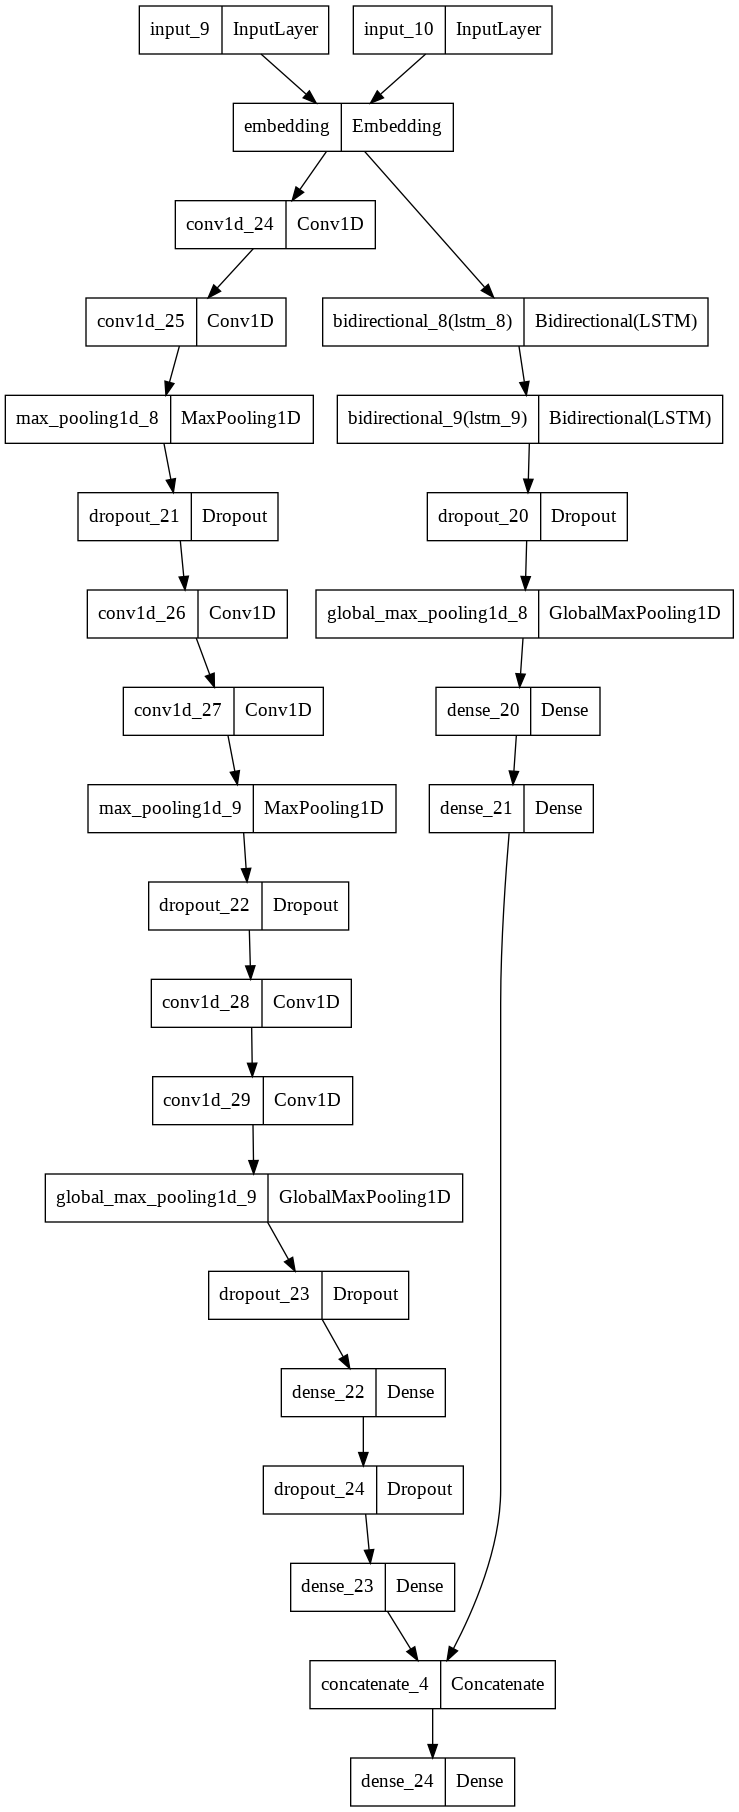

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png')

In [ ]:
#Training the Model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=100)
model.fit([X_train,X_train],y_train,validation_split=0.1,epochs=10,batch_size=128)

Epoch 1/10
495/495 [==============================] - 185s 273ms/step - loss: 0.4902 - accuracy: 0.8767 - val_loss: 0.4178 - val_accuracy: 0.9154
Epoch 2/10
495/495 [==============================] - 131s 265ms/step - loss: 0.3514 - accuracy: 0.9258 - val_loss: 0.3161 - val_accuracy: 0.9363
Epoch 3/10
495/495 [==============================] - 131s 265ms/step - loss: 0.2768 - accuracy: 0.9395 - val_loss: 0.2659 - val_accuracy: 0.9357
Epoch 4/10
495/495 [==============================] - 131s 264ms/step - loss: 0.2267 - accuracy: 0.9480 - val_loss: 0.2192 - val_accuracy: 0.9465
Epoch 5/10
495/495 [==============================] - 131s 264ms/step - loss: 0.1895 - accuracy: 0.9548 - val_loss: 0.2073 - val_accuracy: 0.9430
Epoch 6/10
495/495 [==============================] - 131s 264ms/step - loss: 0.1616 - accuracy: 0.9615 - val_loss: 0.1738 - val_accuracy: 0.9516
Epoch 7/10
495/495 [==============================] - 131s 264ms/step - loss: 0.1380 - accuracy: 0.9661 - val_loss: 0.1682 -

In [ ]:
#Evaluating the Model
score = model.evaluate([X_test,X_test],y_test)
print(score)

550/550 [==============================] - 69s 125ms/step - loss: 0.1474 - accuracy: 0.9488
[0.1474221795797348, 0.9488419890403748]


In [ ]:
#Printing the Accuracy
print(score[1]*100)

94.88419890403748


In [ ]:
pred = model.predict([X_test,X_test])

In [ ]:
pred

array([[0.9678499 , 0.02795268],
       [0.0627818 , 0.94227934],
       [0.964351  , 0.03116759],
       ...,
       [0.96780974, 0.02798024],
       [0.96090597, 0.03457104],
       [0.13349931, 0.87596005]], dtype=float32)

In [ ]:
for i in range(len(pred)):
  x=pred[i]
  if x[0] > 0.5:
    x[0]=1
    x[1]=0
  else:
    x[0]=0
    x[1]=1

In [ ]:
pred

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

[[8431  368]
 [ 534 8240]]


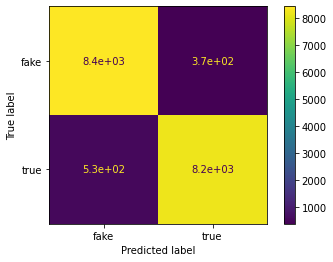

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print(cm)
disp =ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['fake','true'])
disp.plot()

In [ ]:
print(classification_report(y_test, pred, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.94      0.96      0.95      8799
        True       0.96      0.94      0.95      8774

   micro avg       0.95      0.95      0.95     17573
   macro avg       0.95      0.95      0.95     17573
weighted avg       0.95      0.95      0.95     17573
 samples avg       0.95      0.95      0.95     17573

